# Feature Engineering

In [2]:
import numpy as np

In [3]:
print(np.__version__)

2.1.3


In [4]:
#!pip uninstall numpy -y
#!pip install numpy<2 --no-cache-dir

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,MinMaxScaler,RobustScaler
import warnings
import matplotlib.pyplot as plt

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("loan_approved.csv")

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

#### Data Cleaning
- Dropping columns: dropna(), drop(), drop_duplicates()
- Filling/Imputing: fillna(), or impute manually
- Winsorization

In [11]:
df.duplicated().sum()   #To get the number of duplicate rows
df.drop_duplicates()    #To remove or delete or drop duplicate rows from data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df.shape

(614, 13)

In [13]:
#df.drop('Gender',axis=1,inplace=True)
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
#Null columns: 'Gender','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History'

#df.fillna(value = {'Gender': 'F','LoanAmount':np.mean(df.LoanAmount),'Credit_History':df.Credit_History.median()})
#df.fillna(0)

#df.loc[df.LoanAmount.isnull(),'LoanAmount'] = df.LoanAmount.mean()  # - Each individual column can be imputed separately

In [15]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [16]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [17]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [18]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [19]:
df.fillna(value = {'Gender': 'Male','LoanAmount':df.LoanAmount.median(),'Credit_History':df.Credit_History.median(),'Dependents':'0','Self_Employed':'No','Loan_Amount_Term':360.0},inplace=True)

In [20]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   3
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [21]:
df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [22]:
df.loc[df.Married.isnull(),'Married'] = 'Yes'
#df.loc[(df.Married.isnull()&df.Dependents=='0'),'Married']='No'
#df.loc[(df.Married.isnull()&df.Dependents!='0'),'Married']='Yes'
#df.loc[(df.Married.isnull()&df.CoapplicantIncome==0),'Married']='No'
#df.loc[(df.Married.isnull()&df.CoapplicantIncome!=0),'Married']='Yes'

In [23]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

### Outlier Handling

<Axes: xlabel='ApplicantIncome'>

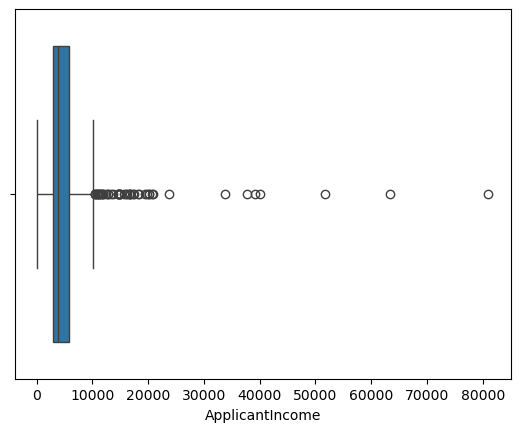

In [24]:
#Winsorization
sns.boxplot(x=df.ApplicantIncome ,orient='h')

In [25]:
from scipy.stats.mstats import winsorize
#Specify trim percentage
trim_p = 0.08
df['ApplicantIncome1'] = winsorize(df['ApplicantIncome'],limits=trim_p)    #winsorize=means to have 8%of left and right..percentange may be change a/t ..

<Axes: xlabel='ApplicantIncome1'>

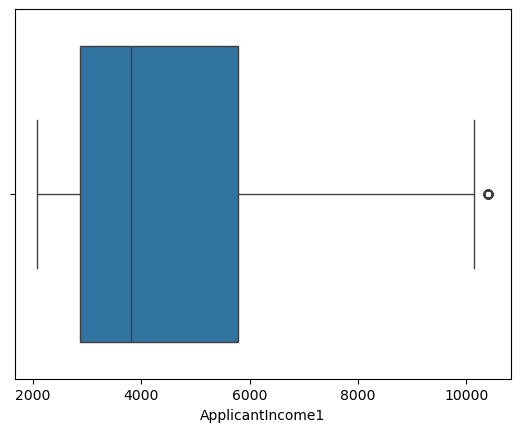

In [26]:
sns.boxplot(x=df.ApplicantIncome1 ,orient='h')

In [27]:
#Manually setting limits
df.loc[df.ApplicantIncome>20000,'ApplicantIncome'] = 20000

In [28]:
#Removing Outliers using IQR

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df.loc[(df['LoanAmount'] <= lower_bound),'LoanAmount'] = lower_bound
df.loc[(df['LoanAmount'] >= upper_bound),'LoanAmount'] = upper_bound

<Axes: xlabel='LoanAmount'>

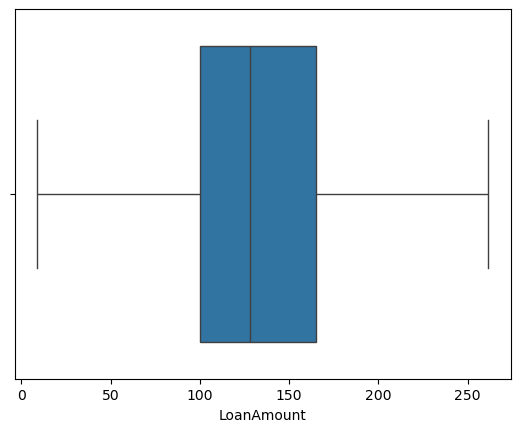

In [29]:
sns.boxplot(x=df.LoanAmount ,orient='h')

## Types Of Transformation

1. Scaling is also indirectly transforming the variable. Standardization, Normal MinMax, Robust scaling are the techniques used.
3. Logarithmic Transformation
4. Exponential Transformation
5. Box Cox Transformation
6. Square Root Transformation

In [30]:
np.exp(500)                #Transformation is done to comparise the data for normalizing the data

np.float64(1.4035922178528375e+217)

In [31]:
np.log(600)

np.float64(6.396929655216146)

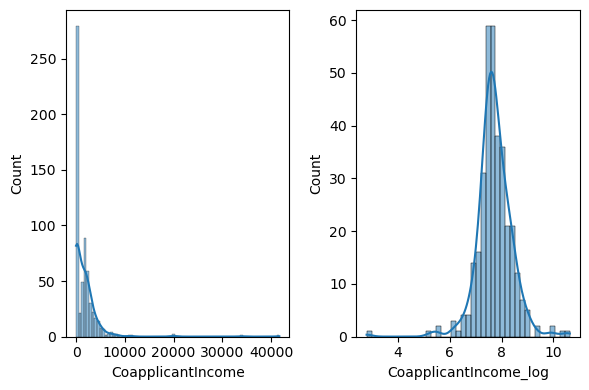

In [32]:
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'])
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=df['CoapplicantIncome'], kde= True)
plt.subplot(1,2,2)
sns.histplot(x=df['CoapplicantIncome_log'], kde= True)
plt.tight_layout()

<Axes: xlabel='ApplicantIncome_exp2', ylabel='Count'>

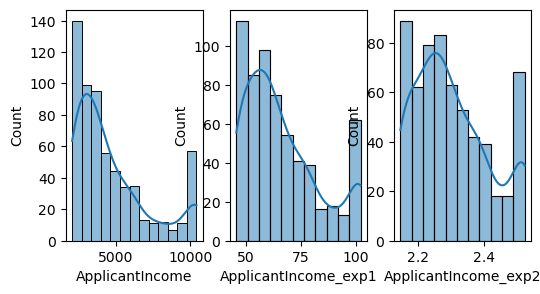

In [33]:
df['ApplicantIncome_exp1']=df.ApplicantIncome**(0.5)
df['ApplicantIncome_exp2']=df.ApplicantIncome**(0.1)
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
sns.histplot(x=df['ApplicantIncome'], kde= True)
plt.subplot(1,3,2)
sns.histplot(x=df['ApplicantIncome_exp1'], kde= True)
plt.subplot(1,3,3)
sns.histplot(x=df['ApplicantIncome_exp2'], kde= True)

In [34]:
from scipy.stats import boxcox
transformed_data, lambda_value = boxcox(df['ApplicantIncome'])

In [35]:
transformed_data

array([1.90532033, 1.90243761, 1.89647418, 1.89403433, 1.90560105,
       1.90445255, 1.89226312, 1.89666061, 1.900684  , 1.91084235,
       1.89746923, 1.89347621, 1.89684876, 1.89017766, 1.89017766,
       1.90338775, 1.8991856 , 1.89883799, 1.90323239, 1.89414529,
       1.90811083, 1.90551852, 1.89414529, 1.89822162, 1.89965384,
       1.91012811, 1.89536714, 1.90139543, 1.89017766, 1.89977754,
       1.90120707, 1.89731164, 1.90273156, 1.89879673, 1.91084235,
       1.89181047, 1.89017766, 1.8994632 , 1.90120707, 1.89977009,
       1.89920146, 1.89017766, 1.8927652 , 1.90046234, 1.90273951,
       1.89841717, 1.90493112, 1.90526707, 1.89443377, 1.90066376,
       1.89017766, 1.89691405, 1.90140784, 1.90252772, 1.91084235,
       1.89482534, 1.89061553, 1.89822601, 1.90861823, 1.89818644,
       1.89347621, 1.89662463, 1.89420359, 1.90337553, 1.90120707,
       1.90508341, 1.89746923, 1.91084235, 1.90736455, 1.90162221,
       1.89750706, 1.89017766, 1.89879673, 1.90289678, 1.90412

In [36]:
lambda_value

np.float64(-0.5190276063497593)

<Axes: xlabel='ApplicantIncome_boxcox', ylabel='Count'>

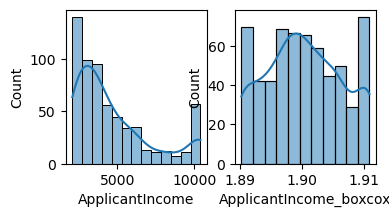

In [37]:
df['ApplicantIncome_boxcox'] = transformed_data
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
sns.histplot(x=df['ApplicantIncome'], kde= True)
plt.subplot(1,2,2)
sns.histplot(x=df['ApplicantIncome_boxcox'], kde= True)

In [38]:
#from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),ApplicantIncome1,CoapplicantIncome_log,ApplicantIncome_exp1,ApplicantIncome_exp2,ApplicantIncome_boxcox
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849,-inf,76.478755,2.380719,1.905320
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583,7.318540,67.697858,2.323352,1.902438
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000,-inf,54.772256,2.226959,1.896474
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583,7.765569,50.823223,2.193878,1.894034
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000,-inf,77.459667,2.386795,1.905601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900,-inf,53.851648,2.219422,1.895938
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106,-inf,64.078077,2.297957,1.901015
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8072,5.480639,89.844310,2.458658,1.908609
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583,-inf,87.080423,2.443341,1.908013


In [39]:
from sklearn.preprocessing import StandardScaler     #standardscaler=x-mean divided by sigma
scaler = StandardScaler()
ApplicantIncome_scaled = scaler.fit_transform(df[['ApplicantIncome']])

In [40]:
ApplicantIncome_scaled

array([[ 4.75088189e-01],
       [-3.57404733e-02],
       [-6.74478051e-01],
       [-8.42736781e-01],
       [ 5.36016411e-01],
       [ 3.00776987e-01],
       [-9.43611319e-01],
       [-6.59952117e-01],
       [-2.68558908e-01],
       [ 2.31463627e+00],
       [-5.93778420e-01],
       [-8.76227127e-01],
       [-6.45022685e-01],
       [-1.04448586e+00],
       [-1.04448586e+00],
       [ 1.12343349e-01],
       [-4.33993151e-01],
       [-4.68693992e-01],
       [ 8.69229655e-02],
       [-8.35877312e-01],
       [ 1.20582335e+00],
       [ 5.17858994e-01],
       [-8.35877312e-01],
       [-5.27201224e-01],
       [-3.85169874e-01],
       [ 1.97246984e+00],
       [-7.55581179e-01],
       [-1.79789314e-01],
       [-1.04448586e+00],
       [-3.71854435e-01],
       [-2.03999203e-01],
       [-6.07093859e-01],
       [ 8.24082548e-03],
       [-4.72728974e-01],
       [ 2.31463627e+00],
       [-9.67014212e-01],
       [-1.04448586e+00],
       [-4.05344782e-01],
       [-2.0

In [41]:
from sklearn.preprocessing import MinMaxScaler   #each value is substracted by min-max=x-xmin divide by xmax-xmin
#ApplicantIncome_scaled2 = MinMaxScaler().fit_transform(df[['ApplicantIncome']])
ApplicantIncome_scaled2 = scaler.fit_transform(df[['ApplicantIncome']])

In [42]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
ApplicantIncome_scaled3 = scaler.fit_transform(df[['ApplicantIncome']])

### Encoding
- Converting categorical variables into numerical so that the model can process them
- OHE (one hot encoding) - Create as many columns as unique values of the categorical feature. Done to those features that cannot(shouldn't) have an ordinality.
- Label Encoding - Let the default lexicographic (alphabetical order) endocing happen. Numbers automatically assigned without any order. Renders a 1-d output (unlike all other scalers and encoders that render a 2d output) as it is designed to encode target columns
- Ordinal Encoding - Speicify the order in which numerical labels must be assigned. Done when the data is ordinal
- Frequency Encoding - Specify the order based on frequency or value_counts

In [43]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)', 'ApplicantIncome1', 'CoapplicantIncome_log',
       'ApplicantIncome_exp1', 'ApplicantIncome_exp2',
       'ApplicantIncome_boxcox'],
      dtype='object')

In [44]:
# OHE - One Hot Encoding
#df.Married.value_counts()
pd.get_dummies(df, columns=['Married'],dtype='int')

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),ApplicantIncome1,CoapplicantIncome_log,ApplicantIncome_exp1,ApplicantIncome_exp2,ApplicantIncome_boxcox,Married_No,Married_Yes
0,LP001002,Male,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849,-inf,76.478755,2.380719,1.905320,1,0
1,LP001003,Male,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583,7.318540,67.697858,2.323352,1.902438,0,1
2,LP001005,Male,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000,-inf,54.772256,2.226959,1.896474,0,1
3,LP001006,Male,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583,7.765569,50.823223,2.193878,1.894034,0,1
4,LP001008,Male,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000,-inf,77.459667,2.386795,1.905601,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900,-inf,53.851648,2.219422,1.895938,1,0
610,LP002979,Male,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106,-inf,64.078077,2.297957,1.901015,0,1
611,LP002983,Male,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8072,5.480639,89.844310,2.458658,1.908609,0,1
612,LP002984,Male,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583,-inf,87.080423,2.443341,1.908013,0,1


In [45]:
#OHE from sklearn
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
result = enc.fit_transform(df[['Married']]).toarray()

In [46]:
df.Married.unique()

array(['No', 'Yes'], dtype=object)

In [47]:
result

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [48]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder   
enc = LabelEncoder()
df['Gender_enc'] = enc.fit_transform(df.Gender)
df[['Gender','Gender_enc']]

,Gender,Gender_enc
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Male,1
...,...,...
609,Female,0
610,Male,1
611,Male,1
612,Male,1


In [49]:
enc.fit_transform(df.Gender)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [50]:
#Frequency encoding using Ordinal Encoder with value_counts
from sklearn.preprocessing import OrdinalEncoder
df.Gender.value_counts()
enc = OrdinalEncoder(categories=[['Male','Female']])
df['Gender_OE1'] = enc.fit_transform(df[['Gender']])


In [51]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
df.Property_Area.unique()
enc = OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
df['OE_Prop_Area'] = enc.fit_transform(df[['Property_Area']])
df[['Property_Area','OE_Prop_Area']]

,Property_Area,OE_Prop_Area
0,Urban,2.0
1,Rural,0.0
2,Urban,2.0
3,Urban,2.0
4,Urban,2.0
...,...,...
609,Rural,0.0
610,Rural,0.0
611,Urban,2.0
612,Urban,2.0


In [52]:
#Frequency encoding using Ordinal Encoder with value_counts
from sklearn.preprocessing import OrdinalEncoder
df.Gender.value_counts()
enc = OrdinalEncoder(categories=[['Male','Female']])
df['Gender_OE1'] = enc.fit_transform(df[['Gender']])

In [53]:
df.Gender_OE1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    1.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Gender_OE1, Length: 614, dtype: float64

In [54]:
enc.fit_transform(df[['Gender']])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

### Feature Creation, Feature Selection, Feature Extraction/Sythesis, Feature Reduction
- Feature creation: Create new columns based on intuition

### PCA - Principal Component Analysis
- Dimensionality curse: After a certain number of columns, distances between the points will become the same. And in that case, the distance based algorithms won't work. In common words, the data has too many features/dependencies that makes it difficult to fit a model, and we are likely to overfit
- In such cases we try to reduce the dimension of the problem (or columns in data). Many techniques are there, principle component Analysis is one of them.
- Correlation is also used to drop columns with high correlation, but when columns aren't correlated with the output, we gotta drop some. We might want to filter them based on relevance to target variable, and the variability within the column.
- PCA comes into picture when all variables are relevant and have no correlation within them.
- Influence of a column on the target variable is found out from the variance within the column. Higher the variance of data in column, higher is the information it contains about target variable, or higher is its influence on target variable.
- Every column is compared to other, we try to shift axis such that variance along one axis shall be maximum and other axis be minumum. In that sense, we drop the axis with minimum variance, and retain the one with maximum variance which is now a function of original two columns. This is called a principle component.
- PCA Algorithm gives all the principal components in ranking order of variance. Each  Within 5-6 components, we can cover 90% of variance of target. In that case, we drop the remaining principal components
- The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

**What are the principal components?**
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

## Scree Plots:
Scree plots are the graphs that convey how much variance is explained by corresponding Principal components.


In [55]:
# importing important labries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [57]:
data = sns.load_dataset('brain_networks')
pd.reset_option('display.max_rows',None)
pd.reset_option('display.max_columns',None)
data

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,915,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,...,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
919,916,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,...,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
920,917,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,...,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
921,918,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,...,103.1552505493164,106.45484924316406,9.04682731628418,46.67441940307617,40.95479583740234,0.8771800398826599,37.57715225219727,20.517745971679688,3.124434232711792,56.71838760375977


In [58]:
data.to_csv('output.csv',index=False)

In [59]:
data = sns.load_dataset('brain_networks').iloc[3:,1:]

In [60]:
pd.reset_option('display.max_rows',None)
pd.reset_option('display.max_columns',None)
data

,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
3,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,-1.8891807794570925,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,15.902982711791992,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
5,60.99776840209961,63.43879318237305,-51.10858154296875,-13.561346054077148,-18.842947006225586,-1.2146592140197754,-65.5758056640625,-85.77742767333984,19.247453689575195,37.20941925048828,...,28.31736946105957,9.063977241516113,45.4932632446289,26.0334415435791,34.21220016479492,1.326109766960144,-22.58075714111328,12.985169410705565,-75.02745056152344,6.434262275695801
6,18.514867782592773,12.65715789794922,-34.576602935791016,-32.665958404541016,-7.420454025268555,17.119447708129886,-41.80086898803711,-58.61018371582031,32.896915435791016,11.19961929321289,...,71.43962860107422,65.84297943115234,-10.69754695892334,55.29746627807617,4.2550063133239755,-2.420143842697144,12.098393440246582,-15.819171905517578,-37.36143112182617,-4.650953769683838
7,-2.5273923873901367,-63.10466766357422,-13.8141508102417,-15.83798885345459,-45.21692657470703,3.4835495948791504,-62.61333465576172,-49.07650756835938,18.396759033203125,3.2190773487091064,...,95.59756469726562,50.96045303344727,-23.19729995727539,43.06756210327149,52.21987533569336,28.23288154602051,-11.71975040435791,5.453648567199707,5.169828414916992,87.80913543701172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,-25.30509376525879,...,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
919,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,-21.783203125,...,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
920,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,-37.02149963378906,...,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
921,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,-17.224781036376953,...,103.1552505493164,106.45484924316406,9.04682731628418,46.67441940307617,40.95479583740234,0.8771800398826599,37.57715225219727,20.517745971679688,3.124434232711792,56.71838760375977


In [61]:
data.reset_index(drop=True,inplace=True)

In [62]:
data

,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,-1.8891807794570925,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,15.902982711791992,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
2,60.99776840209961,63.43879318237305,-51.10858154296875,-13.561346054077148,-18.842947006225586,-1.2146592140197754,-65.5758056640625,-85.77742767333984,19.247453689575195,37.20941925048828,...,28.31736946105957,9.063977241516113,45.4932632446289,26.0334415435791,34.21220016479492,1.326109766960144,-22.58075714111328,12.985169410705565,-75.02745056152344,6.434262275695801
3,18.514867782592773,12.65715789794922,-34.576602935791016,-32.665958404541016,-7.420454025268555,17.119447708129886,-41.80086898803711,-58.61018371582031,32.896915435791016,11.19961929321289,...,71.43962860107422,65.84297943115234,-10.69754695892334,55.29746627807617,4.2550063133239755,-2.420143842697144,12.098393440246582,-15.819171905517578,-37.36143112182617,-4.650953769683838
4,-2.5273923873901367,-63.10466766357422,-13.8141508102417,-15.83798885345459,-45.21692657470703,3.4835495948791504,-62.61333465576172,-49.07650756835938,18.396759033203125,3.2190773487091064,...,95.59756469726562,50.96045303344727,-23.19729995727539,43.06756210327149,52.21987533569336,28.23288154602051,-11.71975040435791,5.453648567199707,5.169828414916992,87.80913543701172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,-25.30509376525879,...,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
916,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,-21.783203125,...,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
917,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,-37.02149963378906,...,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
918,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,-17.224781036376953,...,103.1552505493164,106.45484924316406,9.04682731628418,46.67441940307617,40.95479583740234,0.8771800398826599,37.57715225219727,20.517745971679688,3.124434232711792,56.71838760375977


In [63]:
#data.info(),data.describe(),data.head(),data.columns,data.isnull().sum()
pd.set_option('display.max_rows',None)
data.isnull().sum()

1       0
1.1     0
2       0
2.1     0
3       0
3.1     0
4       0
4.1     0
5       0
5.1     0
6       0
6.1     0
6.2     0
6.3     0
7       0
7.1     0
7.2     0
7.3     0
7.4     0
7.5     0
8       0
8.1     0
8.2     0
8.3     0
8.4     0
8.5     0
9       0
9.1     0
10      0
10.1    0
11      0
11.1    0
12      0
12.1    0
12.2    0
12.3    0
12.4    0
13      0
13.1    0
13.2    0
13.3    0
13.4    0
13.5    0
14      0
14.1    0
15      0
15.1    0
16      0
16.1    0
16.2    0
16.3    0
16.4    0
16.5    0
16.6    0
16.7    0
17      0
17.1    0
17.2    0
17.3    0
17.4    0
17.5    0
17.6    0
dtype: int64

In [64]:
pd.reset_option('display.max_rows',None)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       920 non-null    object
 1   1.1     920 non-null    object
 2   2       920 non-null    object
 3   2.1     920 non-null    object
 4   3       920 non-null    object
 5   3.1     920 non-null    object
 6   4       920 non-null    object
 7   4.1     920 non-null    object
 8   5       920 non-null    object
 9   5.1     920 non-null    object
 10  6       920 non-null    object
 11  6.1     920 non-null    object
 12  6.2     920 non-null    object
 13  6.3     920 non-null    object
 14  7       920 non-null    object
 15  7.1     920 non-null    object
 16  7.2     920 non-null    object
 17  7.3     920 non-null    object
 18  7.4     920 non-null    object
 19  7.5     920 non-null    object
 20  8       920 non-null    object
 21  8.1     920 non-null    object
 22  8.2     920 non-null    ob

In [66]:
data = data.astype('float')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       920 non-null    float64
 1   1.1     920 non-null    float64
 2   2       920 non-null    float64
 3   2.1     920 non-null    float64
 4   3       920 non-null    float64
 5   3.1     920 non-null    float64
 6   4       920 non-null    float64
 7   4.1     920 non-null    float64
 8   5       920 non-null    float64
 9   5.1     920 non-null    float64
 10  6       920 non-null    float64
 11  6.1     920 non-null    float64
 12  6.2     920 non-null    float64
 13  6.3     920 non-null    float64
 14  7       920 non-null    float64
 15  7.1     920 non-null    float64
 16  7.2     920 non-null    float64
 17  7.3     920 non-null    float64
 18  7.4     920 non-null    float64
 19  7.5     920 non-null    float64
 20  8       920 non-null    float64
 21  8.1     920 non-null    float64
 22  8.

In [68]:
# Applying StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
col = data.columns
data = pd.DataFrame(data=scaled_data,columns=col)
pd.reset_option('display.max_rows',None)

In [69]:
scaled_data

array([[ 1.1471002 ,  1.72516359,  0.08607025, ..., -0.28182425,
         2.92507319, -0.80977545],
       [ 1.1366973 ,  0.81923287, -1.66506844, ..., -1.06234583,
         0.60036948, -0.75035332],
       [ 1.24820596,  1.18933247, -1.29933708, ...,  0.3489453 ,
        -1.82305244,  0.13025579],
       ...,
       [-1.60650026, -1.39002592, -1.37389501, ...,  1.79824837,
         1.97914823,  1.3233256 ],
       [-2.11174542, -1.85004921, -1.01973882, ...,  0.55107716,
         0.07485533,  1.15514601],
       [-0.74211991, -0.20122409, -0.77180804, ...,  0.22323248,
         0.81707592,  0.36518654]])

In [70]:
data

,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,1.147100,1.725164,0.086070,0.910341,1.007883,-1.509513,1.682649,0.935351,-1.034199,-0.048175,...,0.010206,-1.208050,1.836036,-0.712296,0.030463,0.207733,1.991584,-0.281824,2.925073,-0.809775
1,1.136697,0.819233,-1.665068,-0.329729,-1.087647,-1.185717,-0.043094,-0.665682,0.563828,0.408914,...,1.085760,-1.313225,3.019941,-0.427128,1.377128,-0.421367,0.895476,-1.062346,0.600369,-0.750353
2,1.248206,1.189332,-1.299337,-0.319994,-0.724844,-0.037055,-2.325276,-3.001639,0.554593,0.956286,...,0.534103,0.154756,1.079776,0.853667,1.015781,0.034971,-0.654007,0.348945,-1.823052,0.130256
3,0.379075,0.237662,-0.879090,-0.770102,-0.285477,0.519557,-1.482293,-2.051112,0.947840,0.288083,...,1.349406,1.130104,-0.253499,1.813020,0.126273,-0.065129,0.348861,-0.424001,-0.908338,-0.095683
4,-0.051415,-1.182147,-0.351304,-0.373632,-1.739320,0.105580,-2.220236,-1.717548,0.530084,0.083059,...,1.806155,0.874453,-0.550089,1.412091,1.550475,0.753918,-0.339923,0.146842,0.124527,1.788837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,-0.151705,-0.089740,-0.093450,0.033493,-0.757058,-0.883921,-0.119890,-0.307125,0.000580,-0.649740,...,1.100710,1.176733,0.542103,2.497589,1.542007,-0.177202,-0.194493,0.614816,1.171316,1.552800
916,-0.686172,-0.723024,-0.652550,-0.713237,0.213924,0.612540,0.634908,0.862120,-0.948827,-0.559261,...,1.130564,0.394227,0.182022,1.670905,0.406629,1.696350,1.658948,0.670673,1.261115,1.314541
917,-1.606500,-1.390026,-1.373895,-0.942193,-0.549217,-0.929372,2.149526,2.169742,-0.944936,-0.950739,...,1.298892,0.852182,1.531983,1.436127,0.241762,1.262895,2.037735,1.798248,1.979148,1.323326
918,-2.111745,-1.850049,-1.019739,-1.058520,0.465730,0.049044,1.197051,1.936339,-0.412805,-0.442153,...,1.949047,1.827734,0.214988,1.530334,1.215986,0.022976,1.085667,0.551077,0.074855,1.155146


In [71]:
from sklearn.decomposition import PCA
pca = PCA()
PC = pca.fit_transform(data)
PC

array([[ 1.65593686e+00,  7.79447081e-01, -2.37739954e+00, ...,
        -8.99135888e-02, -6.38705246e-03, -1.85382239e-02],
       [ 2.32324686e+00, -1.00718903e+00, -1.81479236e+00, ...,
         3.59014336e-01,  3.18062540e-01, -7.93957727e-02],
       [ 3.01161088e-01, -2.71517345e+00, -1.13853459e+00, ...,
        -1.01069709e-01,  2.17387809e-01,  1.56940951e-01],
       ...,
       [ 4.72628302e+00,  2.22709210e+00, -3.07812600e+00, ...,
         1.51180942e-01, -1.72975766e-01, -1.32700822e-01],
       [ 4.95310745e+00,  1.32410447e+00, -1.56178796e+00, ...,
         2.46619842e-01,  2.96500827e-04,  2.29715330e-01],
       [ 2.68268106e+00, -1.44929634e+00,  1.03920075e+00, ...,
        -1.05553380e-01, -1.42979877e-01,  4.31223934e-01]])

In [72]:
PC.shape

(920, 62)

In [73]:
pca.explained_variance_ratio_

array([0.1677418 , 0.12489662, 0.06975952, 0.06214713, 0.05051665,
       0.04316816, 0.03775782, 0.03291807, 0.02642338, 0.02596294,
       0.021825  , 0.02123928, 0.01979959, 0.0170278 , 0.01511907,
       0.01400458, 0.01255813, 0.01194097, 0.01105544, 0.01071825,
       0.01055346, 0.00994686, 0.00940146, 0.00901152, 0.00845123,
       0.00816617, 0.00780246, 0.00752778, 0.00727489, 0.00698534,
       0.00679197, 0.00629085, 0.00607018, 0.00568753, 0.00550428,
       0.0052747 , 0.00506407, 0.00485728, 0.00463524, 0.0045016 ,
       0.00444116, 0.00424734, 0.0040756 , 0.00398116, 0.00389465,
       0.00379363, 0.00355748, 0.0032884 , 0.00321479, 0.00314656,
       0.00297996, 0.00290533, 0.00276982, 0.00257567, 0.00248252,
       0.00234351, 0.00218399, 0.00214109, 0.00203802, 0.0016839 ,
       0.00101119, 0.0008652 ])

In [74]:
a  = np.array([1,2,3,3,2,4,5,3,2])
np.cumsum(a)

array([ 1,  3,  6,  9, 11, 15, 20, 23, 25])

In [75]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1677418 , 0.29263842, 0.36239794, 0.42454507, 0.47506172,
       0.51822988, 0.5559877 , 0.58890577, 0.61532914, 0.64129208,
       0.66311708, 0.68435636, 0.70415595, 0.72118375, 0.73630282,
       0.75030739, 0.76286553, 0.77480649, 0.78586194, 0.79658019,
       0.80713364, 0.8170805 , 0.82648196, 0.83549348, 0.8439447 ,
       0.85211087, 0.85991333, 0.86744111, 0.874716  , 0.88170134,
       0.88849331, 0.89478417, 0.90085435, 0.90654188, 0.91204616,
       0.91732086, 0.92238492, 0.9272422 , 0.93187744, 0.93637904,
       0.9408202 , 0.94506754, 0.94914314, 0.9531243 , 0.95701895,
       0.96081258, 0.96437006, 0.96765846, 0.97087325, 0.97401981,
       0.97699976, 0.97990509, 0.98267492, 0.98525058, 0.9877331 ,
       0.99007661, 0.9922606 , 0.99440169, 0.99643971, 0.99812361,
       0.9991348 , 1.        ])

In [76]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)

(array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)

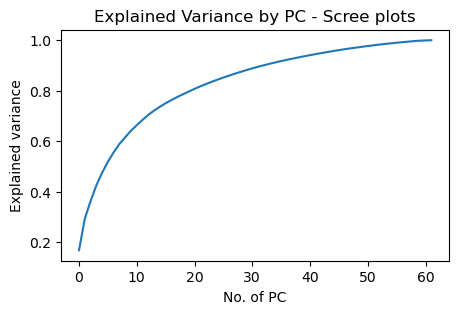

In [77]:
plt.figure(figsize=(5,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of PC')
plt.ylabel('Explained variance')
plt.title('Explained Variance by PC - Scree plots')
plt.show()
#plt.tight_layout()

In [78]:
pca2 = PCA(n_components=32)
data_PCA = pd.DataFrame(pca2.fit_transform(data))

In [79]:
data_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.655937,0.779447,-2.377400,-4.888855,-0.977575,1.336602,3.590963,-0.588800,-1.716008,0.163731,...,0.105576,1.512789,0.288271,-0.227152,-0.370740,-0.107844,0.016816,-0.583516,0.541747,0.006622
1,2.323247,-1.007189,-1.814792,-4.435043,3.095036,-0.082943,2.028901,-1.490401,-1.470771,-2.798729,...,-0.358580,-0.593143,-0.161138,-0.583094,-0.503238,1.040582,1.073539,-0.066294,-0.001978,-0.556261
2,0.301161,-2.715173,-1.138535,-1.573979,1.513119,0.544081,0.665594,-1.687164,1.107657,-2.317461,...,0.990081,-0.698577,1.084922,-0.698920,0.162614,1.191841,0.049779,-0.831352,-0.405824,0.659329
3,0.331745,-3.560087,-0.423917,0.930106,2.305437,-1.585218,0.319676,-0.136145,0.412278,-0.595822,...,0.912560,-1.332299,-0.316321,-0.202485,-0.308746,0.805603,-0.235171,-0.788197,0.730979,-0.529095
4,4.155373,-2.724240,2.273338,0.803203,1.810133,-0.361164,-1.425360,-0.202324,0.941189,-0.100334,...,0.656435,0.457250,-0.127736,0.280703,0.593796,-0.169282,-1.065895,0.388752,0.191891,0.539955
